Titanic Kaggle 

In [1]:
import pandas as pd
datos = pd.read_csv("train.csv")


Visualizamos los las columnas y algunos ejemplos de datos.

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Visualizamos algunos valores importantes como la media, máximo, mínimo, desviación estándar, percentiles.

In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Es importante visualizar los datos, y sb.contplot() nos muestra un conteo fraficado para visualizar mejor.

<Axes: xlabel='Survived', ylabel='count'>

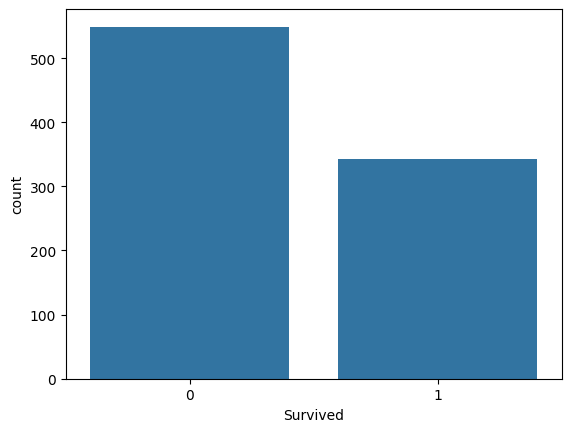

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

Es importante visualizar los datos con diferentes parámetros para ver su relevancia, en este caso es el sexo.

<Axes: xlabel='Survived', ylabel='count'>

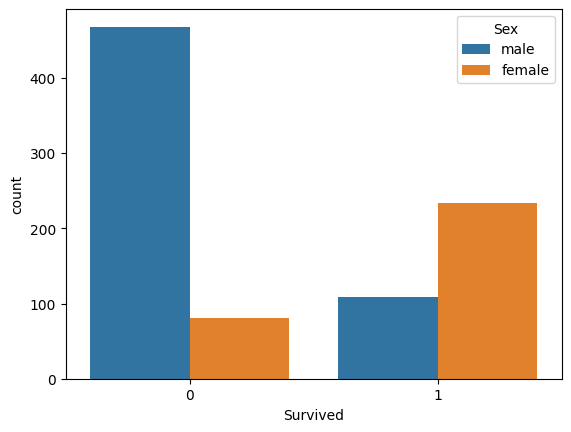

In [5]:
sb.countplot(x="Survived", data=datos, hue="Sex")

#para visualizar los datos que están vacíos = .isna y se agrega .sum() para que suma el total de datos vacíos 

In [6]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

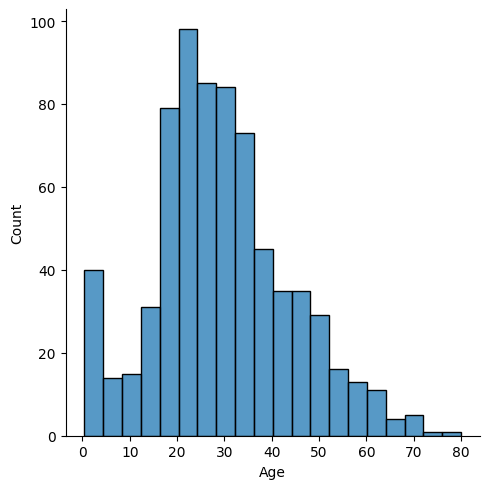

In [7]:
sb.displot(x="Age", data=datos)

Como son muchas casillas las que están vacías en el sexo, si las eliminamos comprometeremos nuestros resultados en la predicción por lo que es mejor llenarlas con el promedio de edad.

In [8]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
# promedio
datos["Age"].mean()

29.69911764705882

#para asignar un valor o un tipo de dato a los campos 

In [10]:

datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [11]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
#revisar
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Los datos cabin no son relevantes ya que cuenta con muchas casillas vacías y las existentes son muy variadas 
#por tanto se elimina con .drop especificando la columna a eliminar y señalando axis=1 porque es una columna.
datos = datos.drop(["Cabin"], axis=1)

In [14]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
# ya que las casillas que quedan sin valor son pocass y no representan una suma significatica
#simplemente se eliminan
datos = datos.dropna()

In [16]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [18]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# ahora necesitamos cambiar la columna del sexo a un valor numerico
# dtype=int para cambiar el tipo de dato 
# drop_first= True cuando solo tenemos dos valores y con que uno represente al cero y otro al uno es suficiente 

dummies_sex = pd.get_dummies (datos["Sex"], dtype=int, drop_first=True )

In [20]:
datos = datos.join(dummies_sex)

In [21]:
datos = datos.drop(["Sex"], axis=1) 

In [22]:
dummies_embarked = pd.get_dummies (datos["Embarked"], dtype=int, drop_first=True)

In [23]:
dummies_embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
datos = datos.join(dummies_embarked)

In [25]:
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

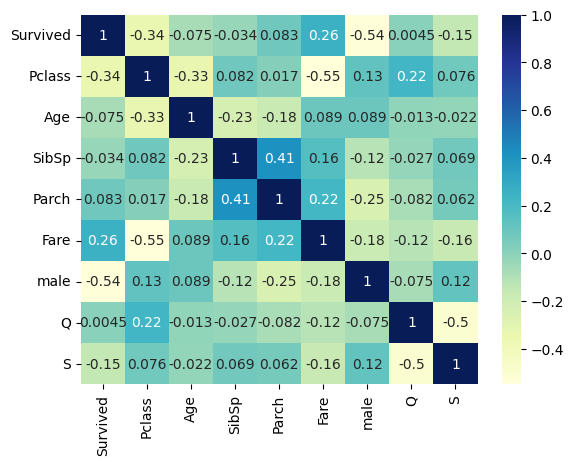

In [26]:

sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

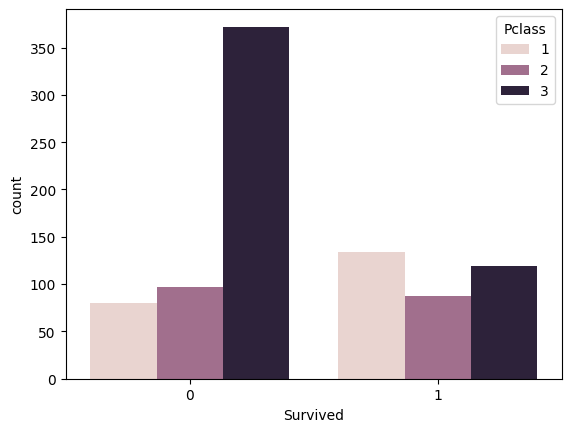

In [27]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

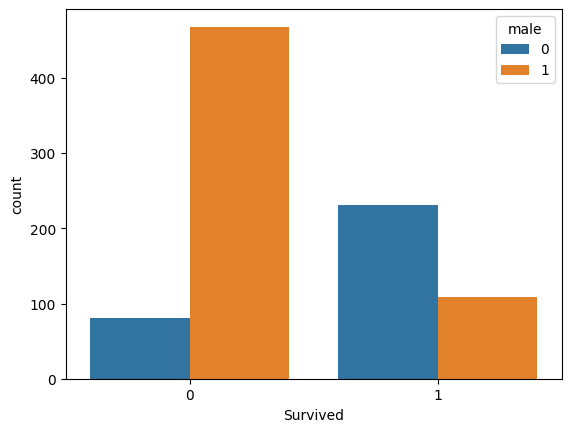

In [28]:
sb.countplot(x="Survived", data=datos, hue="male")

In [29]:
x= datos.drop(["Survived"], axis=1)
y= datos["Survived"]

In [40]:
from numpy import size
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru = train_test_split(x, y, test_size=.2)

In [52]:
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
resultados =[]
for i in range(1,15): 
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo = modelo.fit(x_ent, y_ent)
    predicciones = modelo.predict(x_pru)
    exatitud = accuracy_score(y_pru, predicciones)
    print(f"resultado para {i}: {exatitud}")
    resultados.append(exatitud)

resultado para 1: 0.7808988764044944
resultado para 2: 0.7752808988764045
resultado para 3: 0.8146067415730337
resultado para 4: 0.8258426966292135
resultado para 5: 0.8314606741573034
resultado para 6: 0.8146067415730337
resultado para 7: 0.797752808988764
resultado para 8: 0.797752808988764
resultado para 9: 0.8089887640449438
resultado para 10: 0.8033707865168539
resultado para 11: 0.7528089887640449
resultado para 12: 0.7471910112359551
resultado para 13: 0.7415730337078652
resultado para 14: 0.7415730337078652


<Axes: >

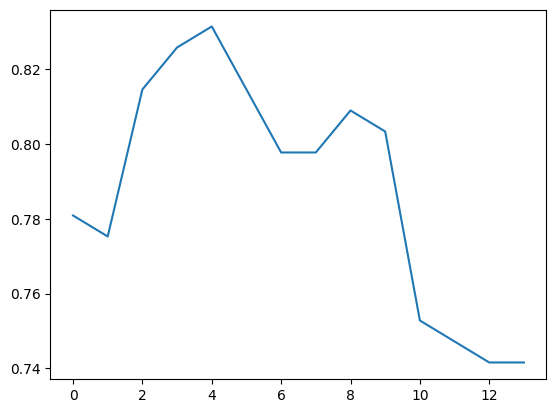

In [53]:
sb.lineplot(data=resultados)

In [54]:
modelo = DecisionTreeClassifier(max_depth=5)
modelo = modelo.fit(x_ent, y_ent)
predicciones = modelo.predict(x_pru)
exatitud = accuracy_score(y_pru, predicciones)



In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       109
           1       0.85      0.68      0.76        69

    accuracy                           0.83       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Prediccion no", "Predicción si"], index=["REal no", "Real si"])

,Prediccion no,Predicción si
REal no,101,8
Real si,22,47


[Text(0.5743243243243243, 0.9166666666666666, 'male <= 0.5\n0.472\n711\n[440, 271]\nMurio'),
 Text(0.2972972972972973, 0.75, 'Pclass <= 2.5\n0.383\n248\n[64, 184]\nvivio'),
 Text(0.12162162162162163, 0.5833333333333334, 'Age <= 2.5\n0.073\n131\n[5, 126]\nvivio'),
 Text(0.05405405405405406, 0.4166666666666667, 'Fare <= 88.775\n0.5\n2\n[1, 1]\nMurio'),
 Text(0.02702702702702703, 0.25, '0.0\n1\n[0, 1]\nvivio'),
 Text(0.08108108108108109, 0.25, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.1891891891891892, 0.4166666666666667, 'Fare <= 13.25\n0.06\n129\n[4, 125]\nvivio'),
 Text(0.13513513513513514, 0.25, 'Age <= 53.5\n0.245\n21\n[3, 18]\nvivio'),
 Text(0.10810810810810811, 0.08333333333333333, '0.18\n20\n[2, 18]\nvivio'),
 Text(0.16216216216216217, 0.08333333333333333, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.24324324324324326, 0.25, 'Fare <= 26.125\n0.018\n108\n[1, 107]\nvivio'),
 Text(0.21621621621621623, 0.08333333333333333, '0.087\n22\n[1, 21]\nvivio'),
 Text(0.2702702702702703, 0.08333333333333333, '0.0

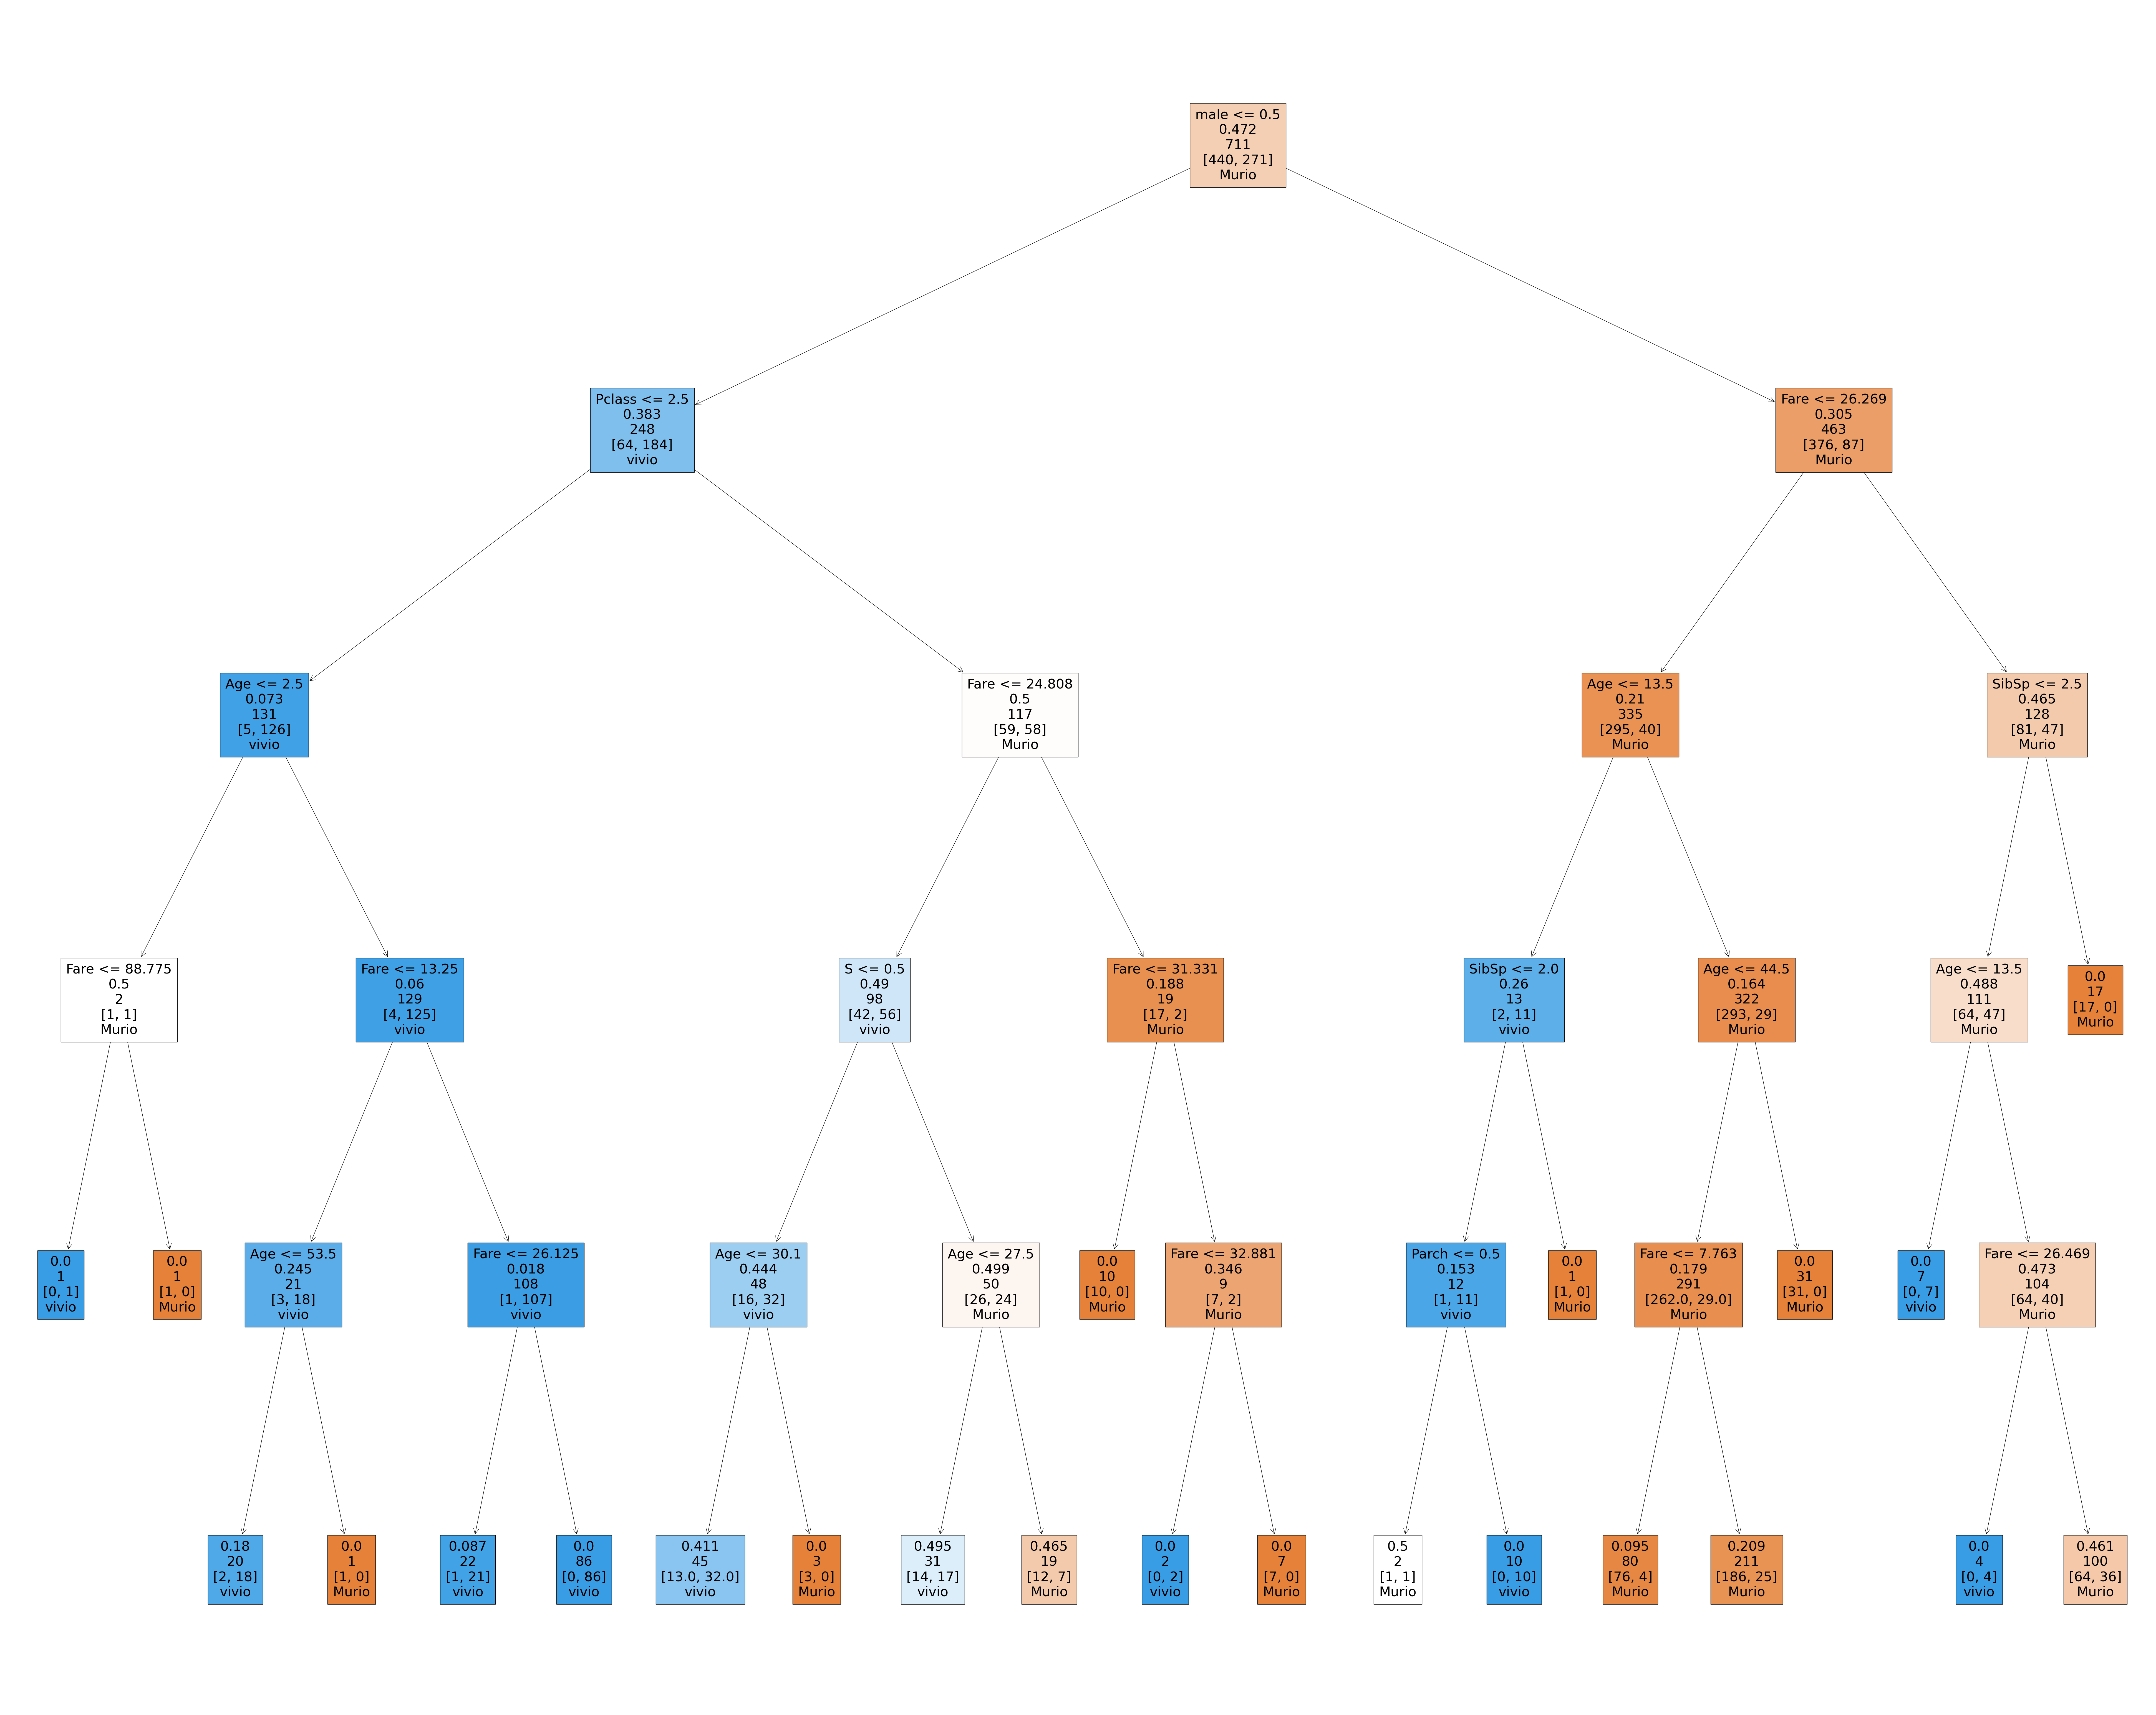

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as pit

pit.figure(figsize=(100,80))
plot_tree(
    modelo, 
    feature_names=x_ent.columns,
    class_names=["Murio", "vivio"],
    filled=True, label="none"

)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pru, predicciones)

0.8539325842696629

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       109
           1       0.84      0.77      0.80        69

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Prediccion no", "Predicción si"], index=["REal no", "Real si"])

,Prediccion no,Predicción si
REal no,99,10
Real si,16,53


In [36]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [37]:
nueva_persona = [1, 35, 2, 0, 10, 0, 0, 0]


In [38]:
prediccion = modelo.predict([nueva_persona])

c:\Users\paz_i\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
if prediccion[0] == 1:
    print("Sobrevivio")
else:
    print("no sobrevivio")

Sobrevivio
